<a href="https://colab.research.google.com/github/vineet891/FODS-Assignment/blob/PartA/FODS_A1_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tqdm
from tqdm import notebook

Loading Dataset

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/My Drive/FODSAssignment/FoDS-A1.csv')
df

,Strength,Temperature,Pressure
0,30.7,240,16
1,24.7,250,18
2,30.6,260,16
3,32.8,240,10
4,20.7,240,20
...,...,...,...
1645,32.5,270,20
1646,38.6,290,14
1647,39.7,290,12
1648,14.6,200,20


Data Preprocessing

In [4]:
#shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)
df

,Strength,Temperature,Pressure
0,43.8,290,12
1,31.2,270,16
2,34.7,300,18
3,31.7,280,18
4,40.2,290,12
...,...,...,...
1645,20.7,210,20
1646,25.2,260,20
1647,22.4,200,10
1648,22.7,220,14


In [5]:
df.describe()

,Strength,Temperature,Pressure
count,1650.000000,1650.000000,1650.000000
mean,30.000000,250.000000,15.000000
std,7.390248,31.632364,3.416686
min,12.400000,200.000000,10.000000
25%,24.400000,220.000000,12.000000
50%,30.200000,250.000000,15.000000
75%,35.700000,280.000000,18.000000
max,48.700000,300.000000,20.000000


In [6]:
# standardize the dataset
df = (df-np.mean(df,axis=0))/np.std(df,axis=0)
df

,Strength,Temperature,Pressure
0,1.867892,1.264911,-0.87831
1,0.162425,0.632456,0.29277
2,0.636166,1.581139,0.87831
3,0.230103,0.948683,0.87831
4,1.380616,1.264911,-0.87831
...,...,...,...
1645,-1.258797,-1.264911,1.46385
1646,-0.649701,0.316228,1.46385
1647,-1.028694,-1.581139,-1.46385
1648,-0.988088,-0.948683,-0.29277


In [7]:
# split the data set into 70:30 train:test 
split_index = int(0.7*len(df))

data = df.values
X = data[:,:-1]
y = data[:,-1]

train_X = X[:split_index]
train_y = y[:split_index]

test_X = X[split_index:]
test_y = y[split_index:]

train_X

array([[ 1.86789178,  1.26491106],
       [ 0.16242537,  0.63245553],
       [ 0.63616604,  1.58113883],
       ...,
       [ 1.05576492,  1.26491106],
       [ 0.09474813,  0.9486833 ],
       [ 0.23010261, -0.31622777]])

In [8]:
#transform the data to degree n
def transform(X,degree):
  X_trans = np.ones((len(X[:,1]), 1), dtype=int)
  for i in range(degree+1):
    for j in range(degree+1-i):
      if i!=0 or j!=0:
        t = np.array([np.multiply(np.power(X[:,0],i),np.power(X[:,-1],j))])
        X_trans = np.concatenate((X_trans, t.T), axis=1)
  return X_trans

**MODEL**

In [23]:
class Regression():

    def __init__(self, X_train, X_test, y_train, y_test):
        self.w = None
        self.X_train, self.X_test, self.y_train, self.y_test = X_train,X_test,y_train, y_test

    def polynomial(self, X):    
        return np.dot(X, self.w.T) 
    
    def mean_squared_error(self, y_pred, y):
        '''
        Evaluates the Mean Squared error of the predicted values by comparing it with the true values.
        Parameters:
            y_pred: Predicted values.
            y: True output values.
        '''
        return sum([(y1-y2)**2 for y1, y2 in zip(y, y_pred)])/len([(y1-y2)**2 for y1, y2 in zip(y, y_pred)])  

    def grad_w(self, x, y):    
        '''
        Calculates the gradient of the weight values.
        Parameters:
            x: Training point
            y:  
        '''
        y_pred = self.polynomial(x)  
        return (y_pred - y)*x

    def predict(self, X):
        '''
        Evaluates the sigmoid function value of the given data.
        Parameters:
            X: testing sample
        '''
        return self.polynomial(X)

    def evaluate(self, x_test, y_test):
        '''
        Evaluates the model for a given testing data
        Parameters:
            x_test: testing samples
            y_test: testing labels
        '''
        y_pred = self.predict(x_test)
        test_loss = self.mean_squared_error(y_pred, y_test)[0]
        print("Testing Error is ", test_loss)

    def fit(self, X,Y, epochs = 1, learning='GD', learning_rate = 1, display_loss=True, printValues=True):

        self.w = np.random.randn(1, X.shape[1])     

        if display_loss:
            loss={}
            accuracy={}
        
        count=0
        for i in tqdm.notebook.tqdm(range(epochs), total=epochs, unit="epoch"):
            dw = 0

            if learning == 'GD':
                for x, y in zip(X, Y):
                    dw += self.grad_w(x,y)   
                    self.w -= learning_rate * (dw/X.shape[0])   

            if learning == 'SGD':
                # for j in range(X.shape[0]):
                randInt = np.random.randint(0,X.shape[0])
                x = X[randInt, :]
                y = Y[randInt]
                dw += self.grad_w(x,y)   
                self.w -= learning_rate * dw   

            if display_loss:
                Y_pred = self.polynomial(X)   
                loss[i] = self.mean_squared_error(Y_pred,Y)[-1]   
                #accuracy[i] = self.accuracy(Y_pred,Y)
                if printValues and i%50==0:
                    print('Epoch:', i,'Loss:', loss[i])#,'Accuracy:', accuracy[i])

        if display_loss and count%50==0:
            plt.subplot(2, 1, 1)
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            
            plt.show()
        count=count+1

        self.evaluate(self.X_test,self.y_test)

    



2 Degree Polynomial

In [16]:
x_train_trans = transform(train_X,2)
x_test_trans = transform(test_X,2)

  0%|          | 0/500 [00:00<?, ?epoch/s]

Epoch: 0 Loss: 0.3763023987477991
Epoch: 50 Loss: 0.1973858676183515
Epoch: 100 Loss: 0.19739354292001648
Epoch: 150 Loss: 0.19739355995916183
Epoch: 200 Loss: 0.19739356005897257
Epoch: 250 Loss: 0.19739356005964667
Epoch: 300 Loss: 0.19739356005965156
Epoch: 350 Loss: 0.1973935600596513
Epoch: 400 Loss: 0.19739356005965147
Epoch: 450 Loss: 0.19739356005965114


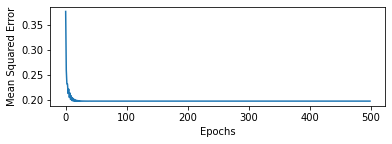

Testing Error is  0.21347583285349891


In [24]:
model2 = Regression(x_train_trans, x_test_trans, train_y, test_y)
model2.fit(x_train_trans, train_y,epochs = 500, learning='GD', learning_rate=0.01)

In [14]:
model2.evaluate(x_test_trans,test_y)

Testing Error is  0.21347535941897308
